<a href="https://colab.research.google.com/github/payalchauhan9/Electric_Vehicle/blob/main/electric_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.mixture import GaussianMixture

**Load Dataset**

In [3]:
ev = pd.read_csv(r"/content/ev.csv")
ev.drop('Unnamed: 0', inplace = True, axis = 1)

In [4]:
ev

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,INR
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480,4540988.068
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000,2455473.000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440,4619563.204
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040,5569012.764
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997,2700774.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000,3683209.500
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050,7861606.055
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000,4092455.000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000,5320191.500


In [5]:
ev.shape

(103, 15)

In [6]:
ev.isnull().sum()

,0
Brand,0
Model,0
AccelSec,0
TopSpeed_KmH,0
Range_Km,0
Efficiency_WhKm,0
FastCharge_KmH,0
RapidCharge,0
PowerTrain,0
PlugType,0


In [7]:
ev.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro', 'INR'],
      dtype='object')

**Data Type**

In [8]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
 14  INR              103 non-null    float64
dtypes: float64(2), int64(6), object(7)
memory usage: 12.2+ KB


**Descriptive Statistics**

In [9]:
ev.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,INR
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,1.030000e+02
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107,4.983453e+06
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280,5.032279e+06
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000,1.647541e+06
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000,2.818024e+06
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000,3.683210e+06
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000,5.345565e+06
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000,4.706232e+07


**EDA**

Pairplot

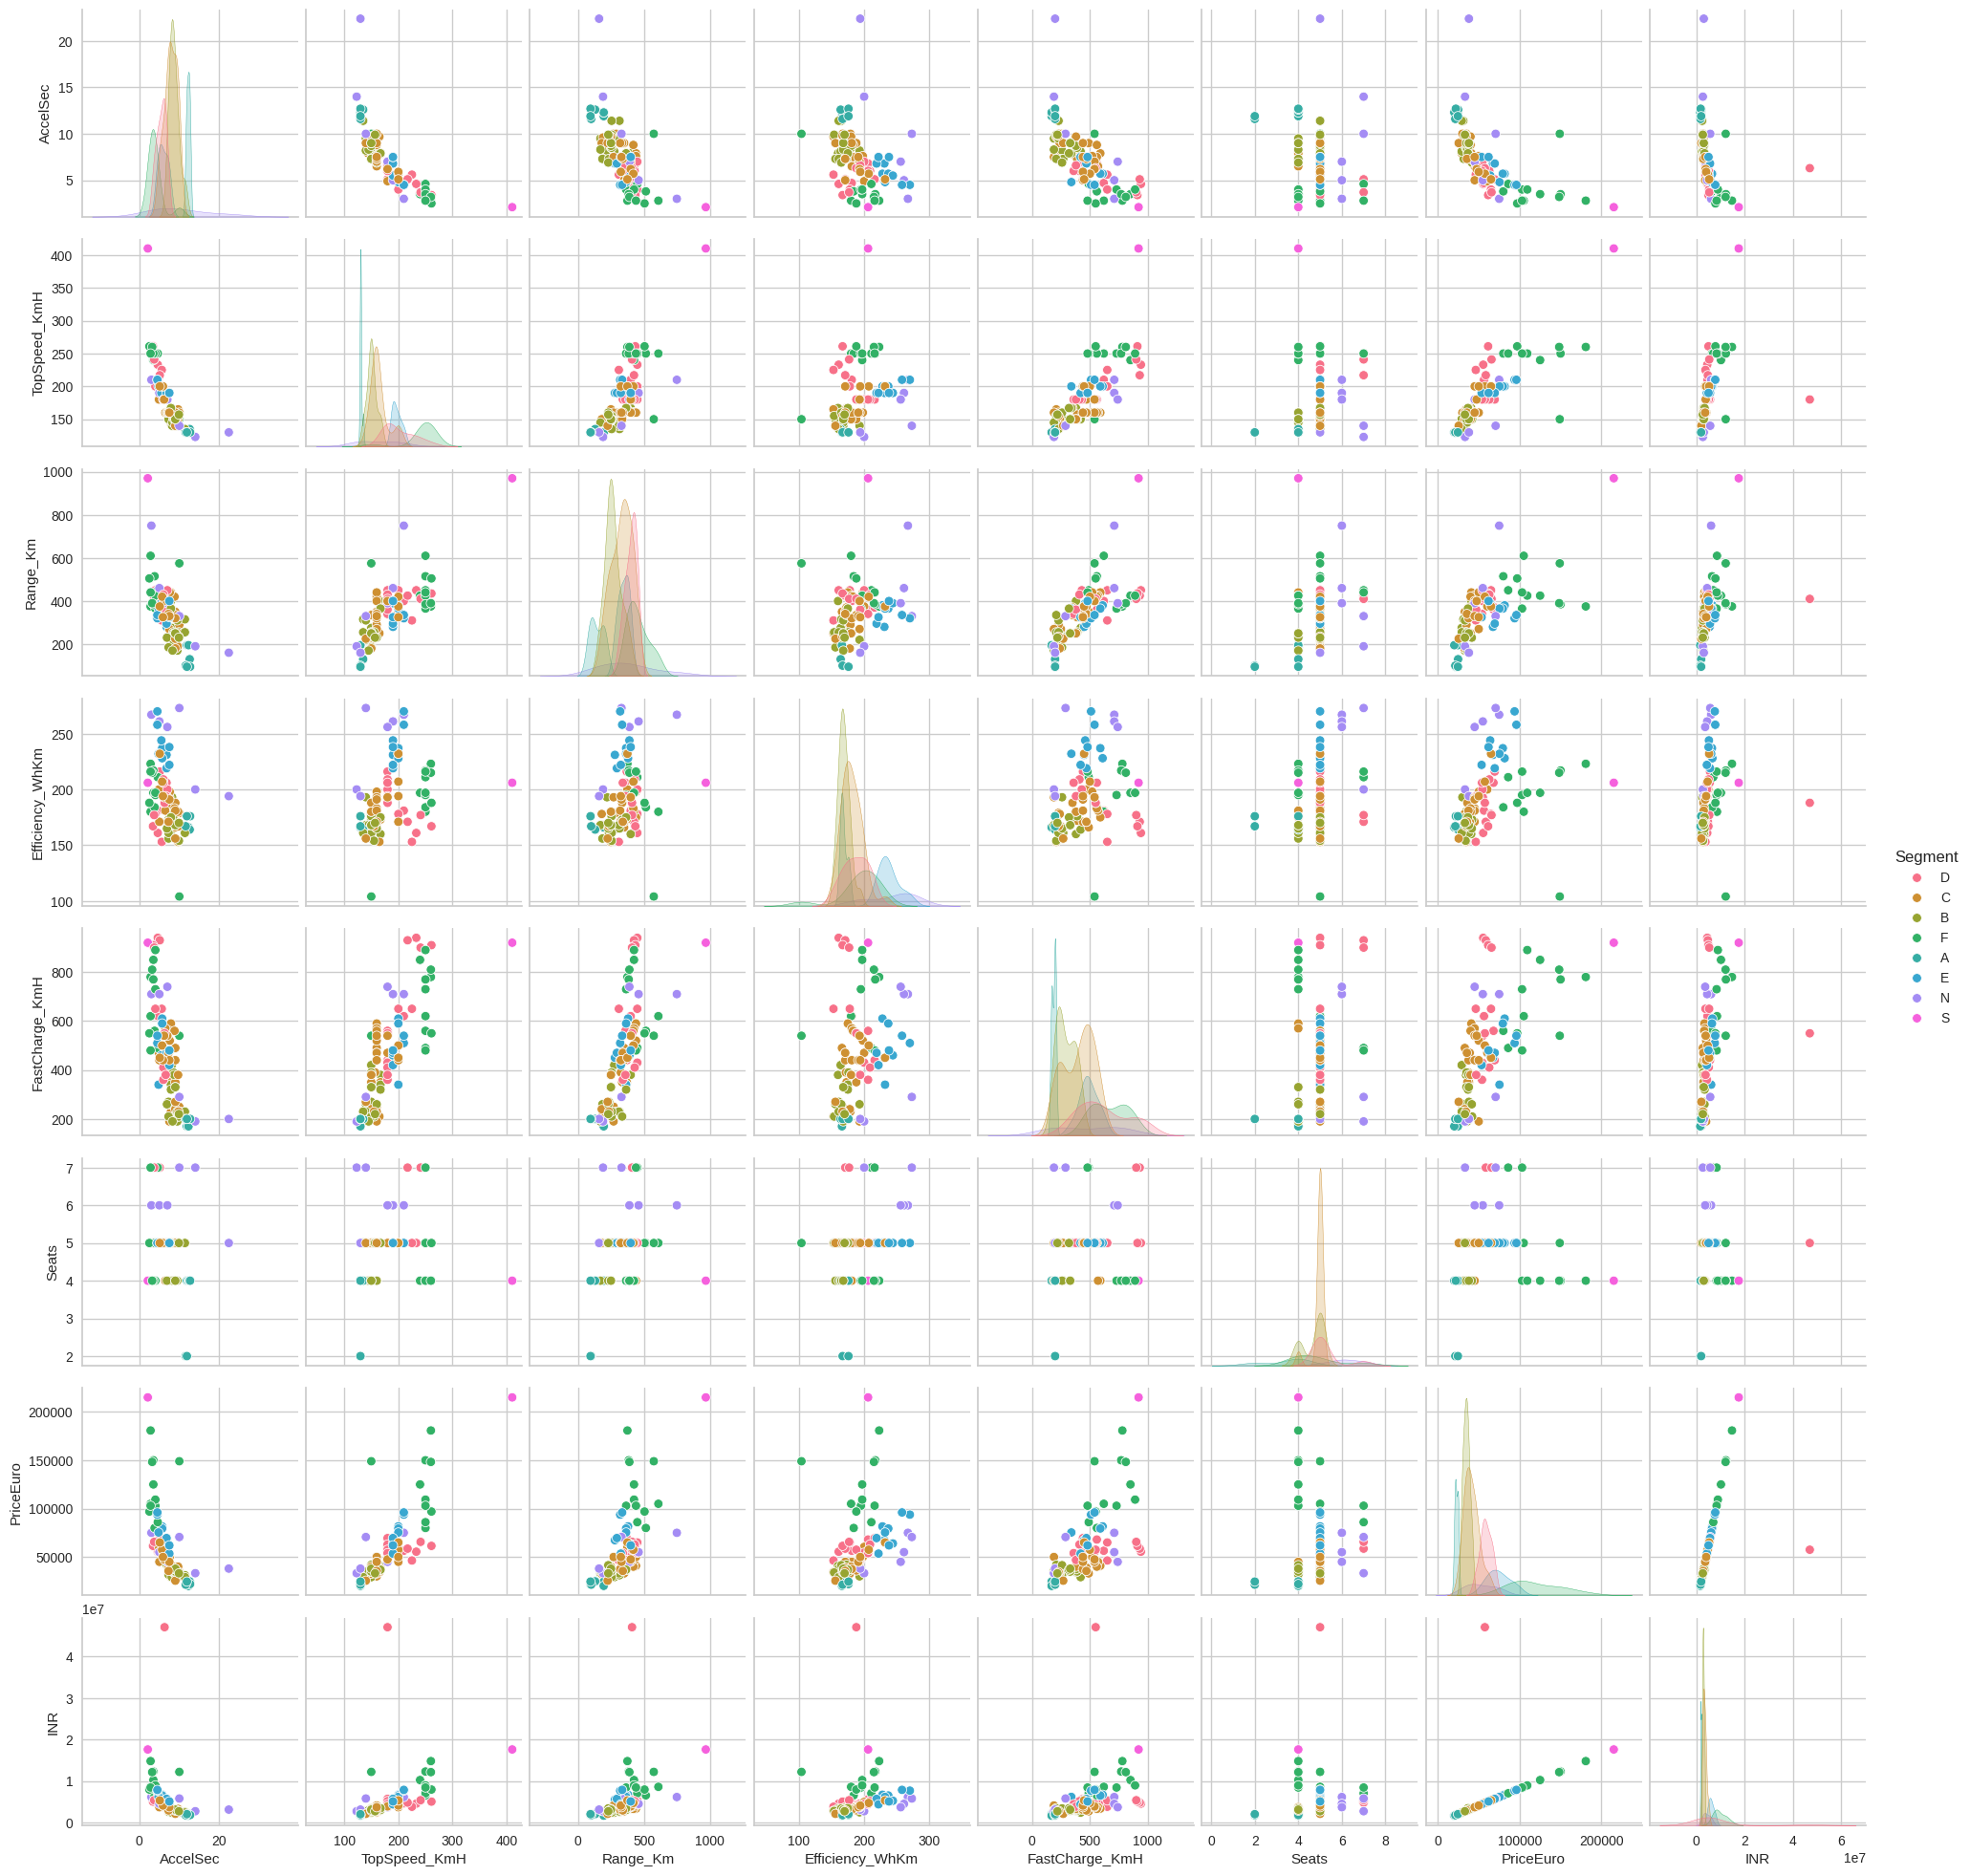

In [10]:
sns.pairplot(ev, hue = 'Segment')

Correlation Matrix

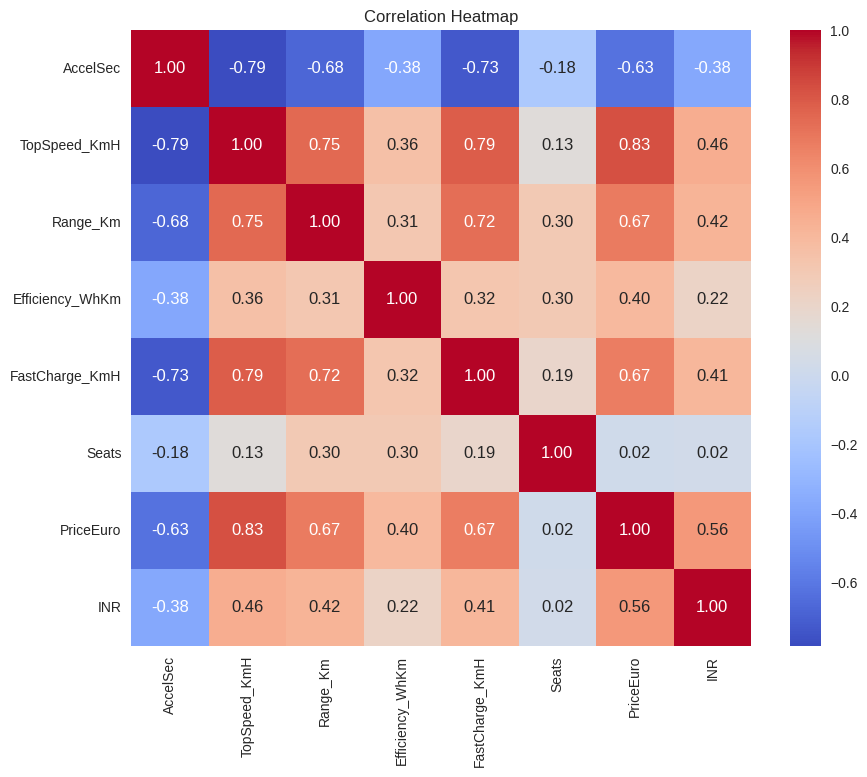

In [11]:
evx = ev.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = evx.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Countplot

<Axes: xlabel='RapidCharge', ylabel='count'>

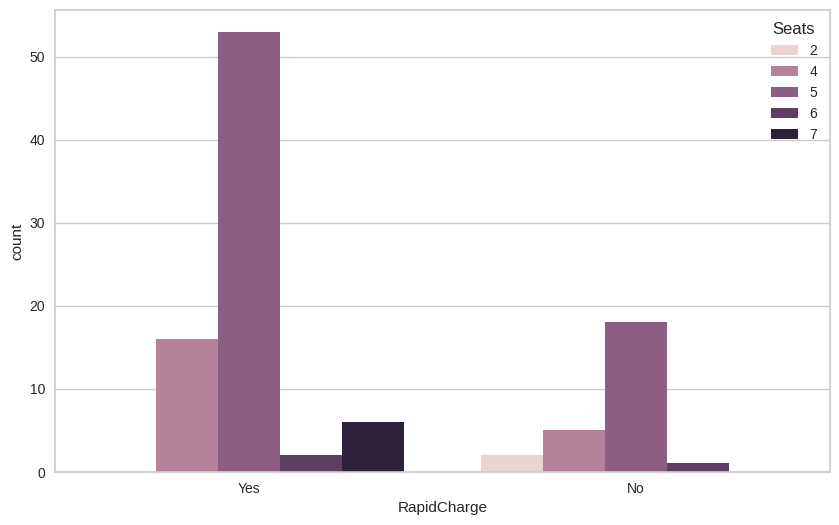

In [12]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'RapidCharge', data = ev, hue = 'Seats' )

<Axes: xlabel='PowerTrain', ylabel='count'>

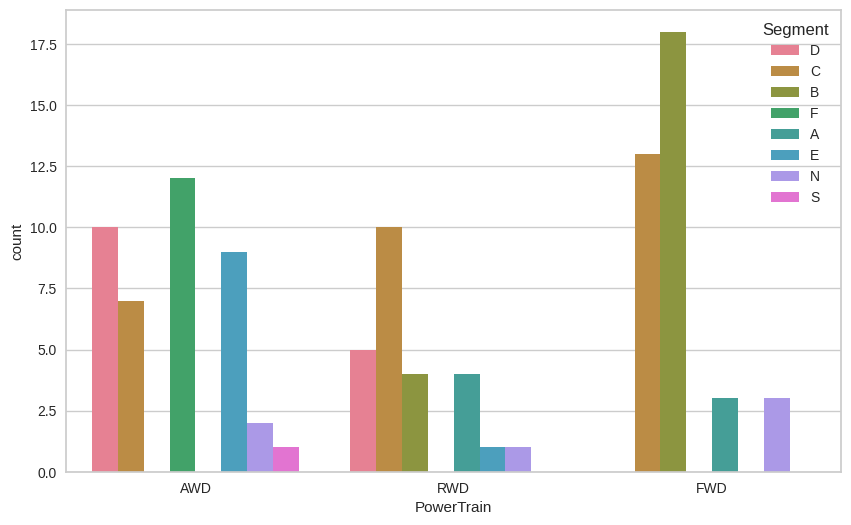

In [13]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'PowerTrain', data = ev, hue = 'Segment' )

<Axes: xlabel='PlugType', ylabel='count'>

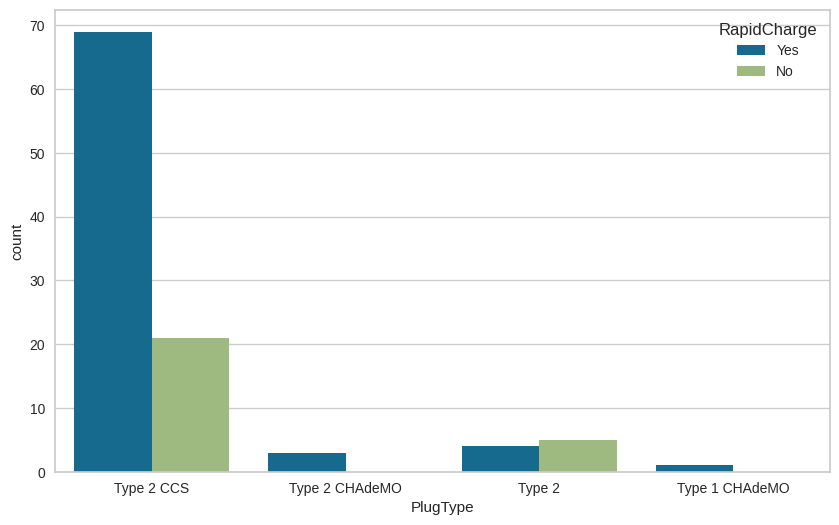

In [14]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'PlugType', data = ev, hue = 'RapidCharge' )

BAR Diagram

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Aiways '),
  Text(1, 0, 'Audi '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Byton '),
  Text(4, 0, 'CUPRA '),
  Text(5, 0, 'Citroen '),
  Text(6, 0, 'DS '),
  Text(7, 0, 'Fiat '),
  Text(8, 0, 'Ford '),
  Text(9, 0, 'Honda '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Jaguar '),
  Text(12, 0, 'Kia '),
  Text(13, 0, 'Lexus '),
  Text(14, 0, 'Lightyear '),
  Text(15, 0, 'Lucid '),
  Text(16, 0, 'MG '),
  Text(17, 0, 'Mazda '),
  Text(18, 0, 'Mercedes '),
  Text(19, 0, 'Mini '),
  Text(20, 0, 'Nissan '),
  Text(21, 0, 'Opel '),
  Text(22, 0, 'Peugeot '),
  Text(23, 0, 'Polestar '),
  Text(24, 0, 'Porsche '),
  Text(25, 0, 'Renault '),
  Text(26, 0, 'SEAT '),
  Text(27, 0, 'Skoda '),
  Text(28, 0, 'Smart '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Tesla '),
  Text(31, 0, 'Volkswagen '),
  Text(32,

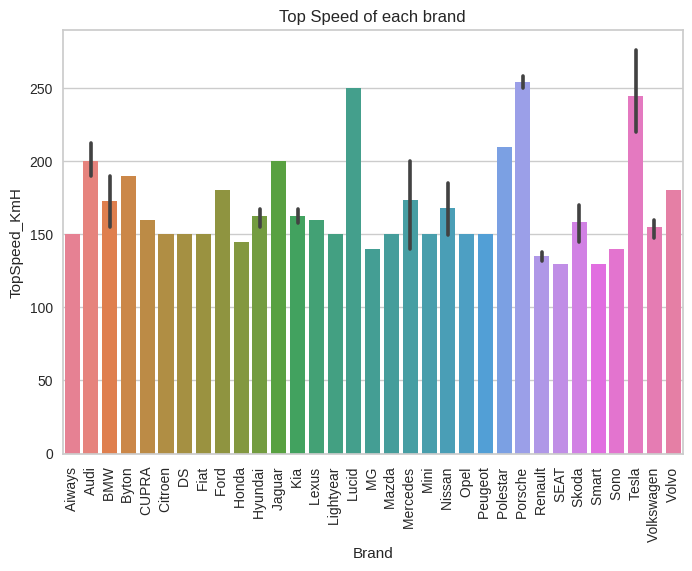

In [77]:
sns.barplot( x = 'Brand', y = 'TopSpeed_KmH', hue = 'Brand',data = ev)
plt.title('Top Speed of each brand')
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Aiways '),
  Text(1, 0, 'Audi '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Byton '),
  Text(4, 0, 'CUPRA '),
  Text(5, 0, 'Citroen '),
  Text(6, 0, 'DS '),
  Text(7, 0, 'Fiat '),
  Text(8, 0, 'Ford '),
  Text(9, 0, 'Honda '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Jaguar '),
  Text(12, 0, 'Kia '),
  Text(13, 0, 'Lexus '),
  Text(14, 0, 'Lightyear '),
  Text(15, 0, 'Lucid '),
  Text(16, 0, 'MG '),
  Text(17, 0, 'Mazda '),
  Text(18, 0, 'Mercedes '),
  Text(19, 0, 'Mini '),
  Text(20, 0, 'Nissan '),
  Text(21, 0, 'Opel '),
  Text(22, 0, 'Peugeot '),
  Text(23, 0, 'Polestar '),
  Text(24, 0, 'Porsche '),
  Text(25, 0, 'Renault '),
  Text(26, 0, 'SEAT '),
  Text(27, 0, 'Skoda '),
  Text(28, 0, 'Smart '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Tesla '),
  Text(31, 0, 'Volkswagen '),
  Text(32,

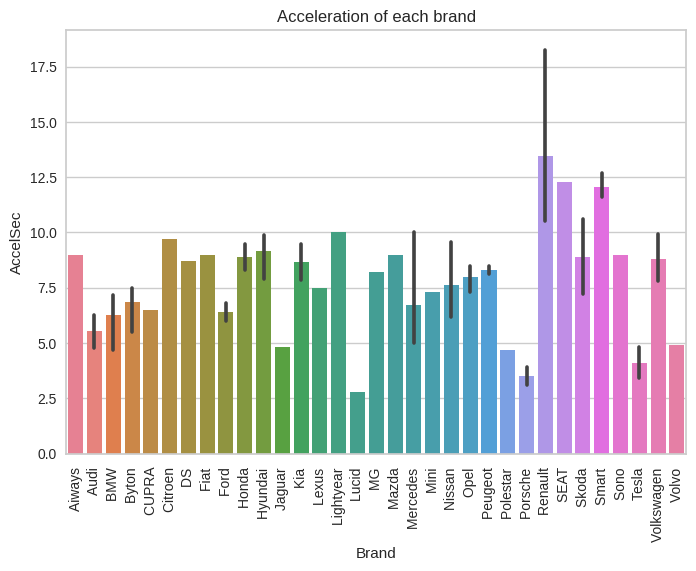

In [78]:
sns.barplot(x = 'Brand', y = 'AccelSec', hue = 'Brand', data = ev)
plt.title('Acceleration of each brand')
plt.xticks(rotation = 90)

In [80]:
px.bar(ev, x = 'PowerTrain', y = 'Range_Km', color = 'PowerTrain', text = 'PowerTrain')

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



{'whiskers': [<matplotlib.lines.Line2D at 0x7b016492f010>,
 'caps': [<matplotlib.lines.Line2D at 0x7b016492f550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b016492ed70>],
 'medians': [<matplotlib.lines.Line2D at 0x7b016492fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b016492fd30>],
 'means': []}

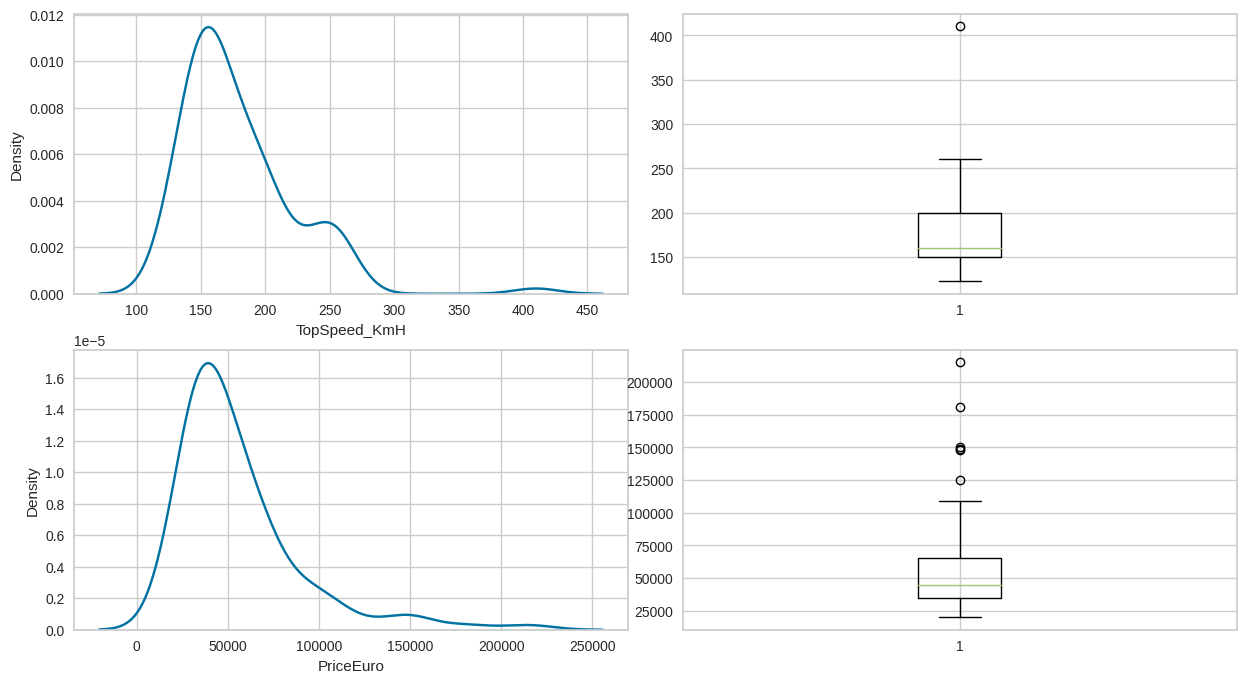

In [18]:
plt.figure(3, figsize=(15, 8))
plt.subplots_adjust(wspace = 0.1)

plt.subplot(221)
sns.kdeplot(data = ev, x = 'TopSpeed_KmH')

plt.subplot(222)
plt.boxplot(data = ev, x = 'TopSpeed_KmH')

plt.subplot(223)
sns.kdeplot(data = ev, x = 'PriceEuro')

plt.subplot(224)
plt.boxplot(data = ev, x= 'PriceEuro')

We can infer the following from the above two graphs:

From Hist plot:

       Most of the cars from dataset has top speed 150 kmph.
       Most of the cars has price 50000 in Euro.

From boxplots:

      Boxplot on 'TopSpeed_KmH' shows that cars with speed more than 250 is rare, and there is 1 such outlier
      Car rates above 125000 are rare.

Categorical Features

Text(0.5, 1.0, 'No. of cars per PlugType')

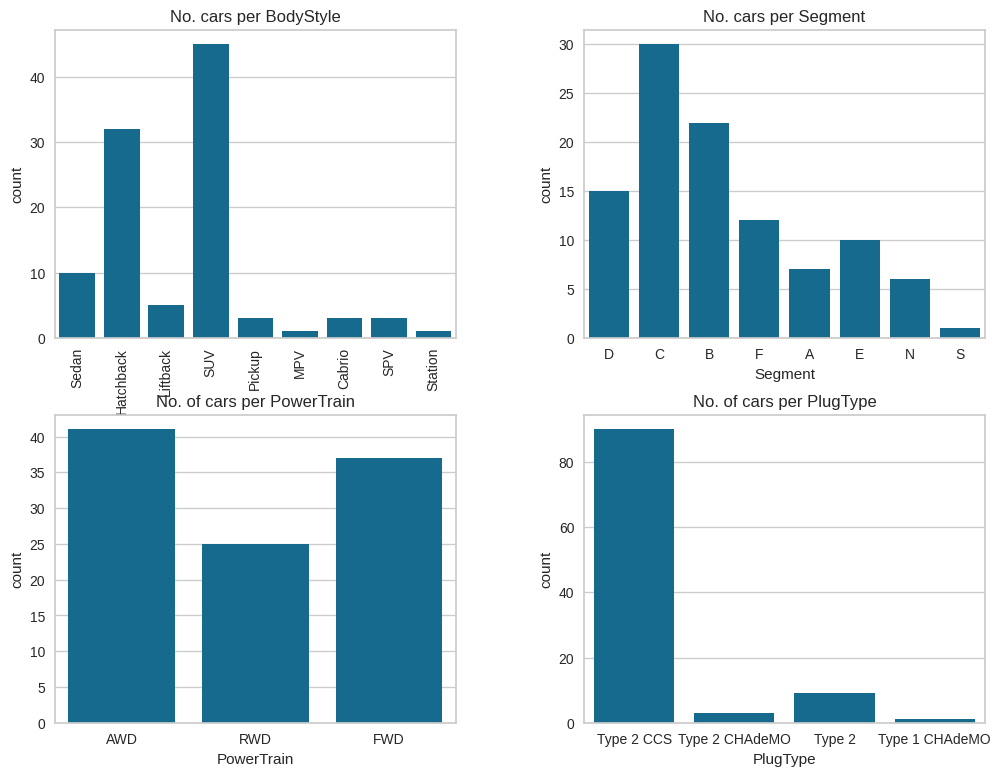

In [19]:
plt.figure(1, figsize = (12,9))
plt.subplots_adjust(wspace = 0.32, hspace = 0.25)

plt.subplot(221)
sns.countplot(data=ev, x ='BodyStyle')
plt.title("No. cars per BodyStyle")
plt.xticks(rotation = 90)

plt.subplot(222)
sns.countplot(data = ev, x = 'Segment')
plt.title("No. cars per Segment")

plt.subplot(223)
sns.countplot(data = ev, x = 'PowerTrain' )
plt.title("No. of cars per PowerTrain")

plt.subplot(224)
sns.countplot(data = ev, x = 'PlugType')
plt.title("No. of cars per PlugType")


Scatter Plot

In [90]:
ev['Seats'] = pd.to_numeric(ev['Seats'])
px.scatter(ev, x = 'Brand', y = 'Range_Km', color = 'Brand', size = 'Seats', hover_data=['RapidCharge'] )

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Axes: title={'center': 'Car Price in INR'}, xlabel='No. of samples'>

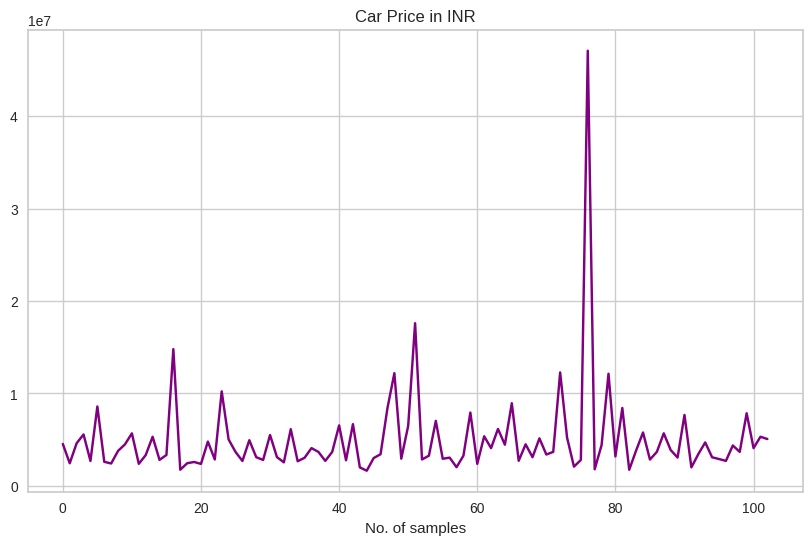

In [21]:
ev['INR'].plot(figsize = (10, 6), title = 'Car Price in INR', xlabel = 'No. of samples', color = 'Purple')

In [22]:
px.pie(ev,names = 'Brand', values = ev['INR'])

In [23]:
px.scatter(ev, x = 'Brand', y = 'AccelSec', color = 'Brand')

In [24]:
px.scatter(ev, x = 'Brand', y = ev['INR'], color = 'Brand')

<ipython-input-25-d10d877bb0bb>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

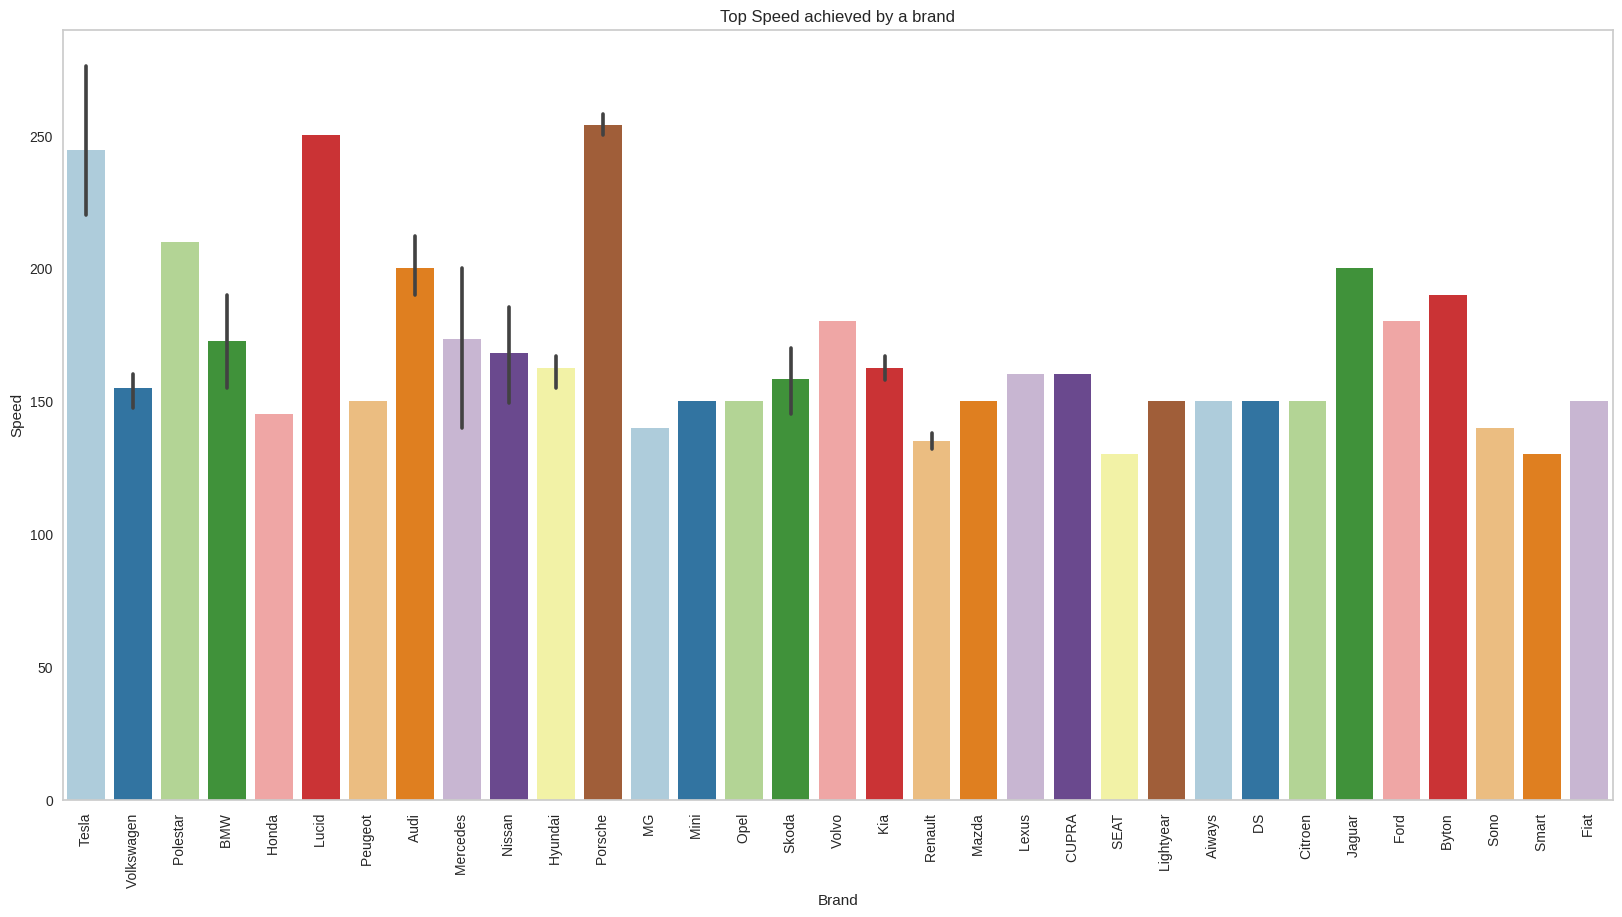

In [25]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Brand',y ='TopSpeed_KmH',data = ev,palette ='Paired')
plt.grid(axis ='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Speed')
plt.xticks(rotation = 90)

Porche, Lucid and Tesla has produced cars with fastest speed and Smart with lowest speed

<ipython-input-26-82874094a6f3>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

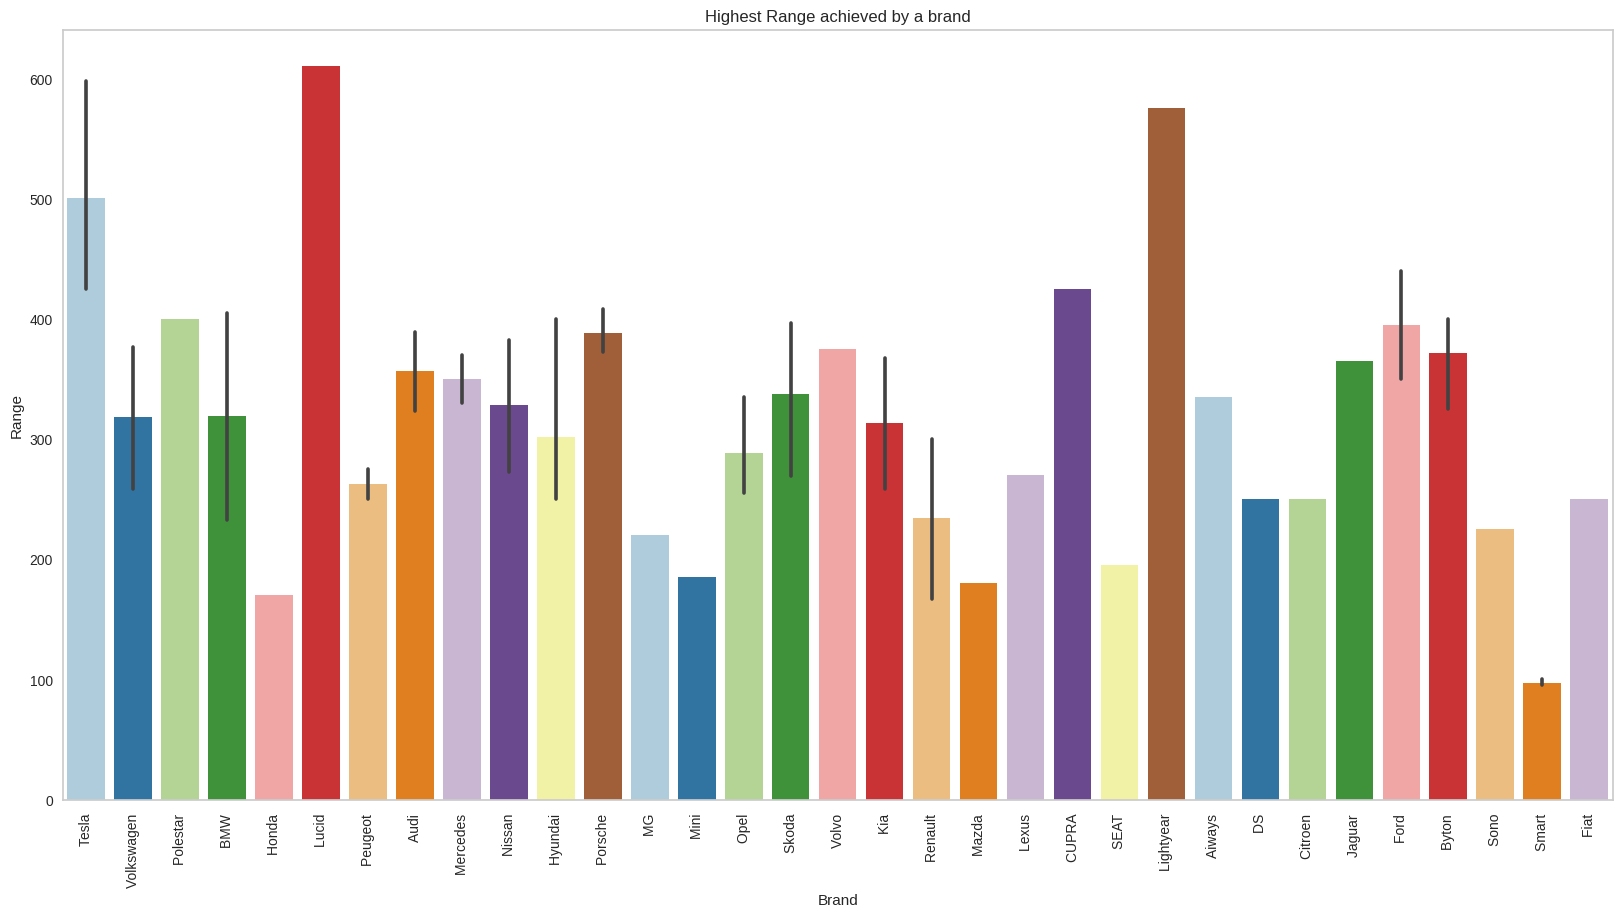

In [26]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Brand',y = 'Range_Km',data = ev,palette ='Paired')
plt.grid(axis ='y')
plt.title('Highest Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation = 90)

Lucid, Lightyear and Tesla have the highest range and Smart the lowest

<ipython-input-27-ec863e0f3367>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

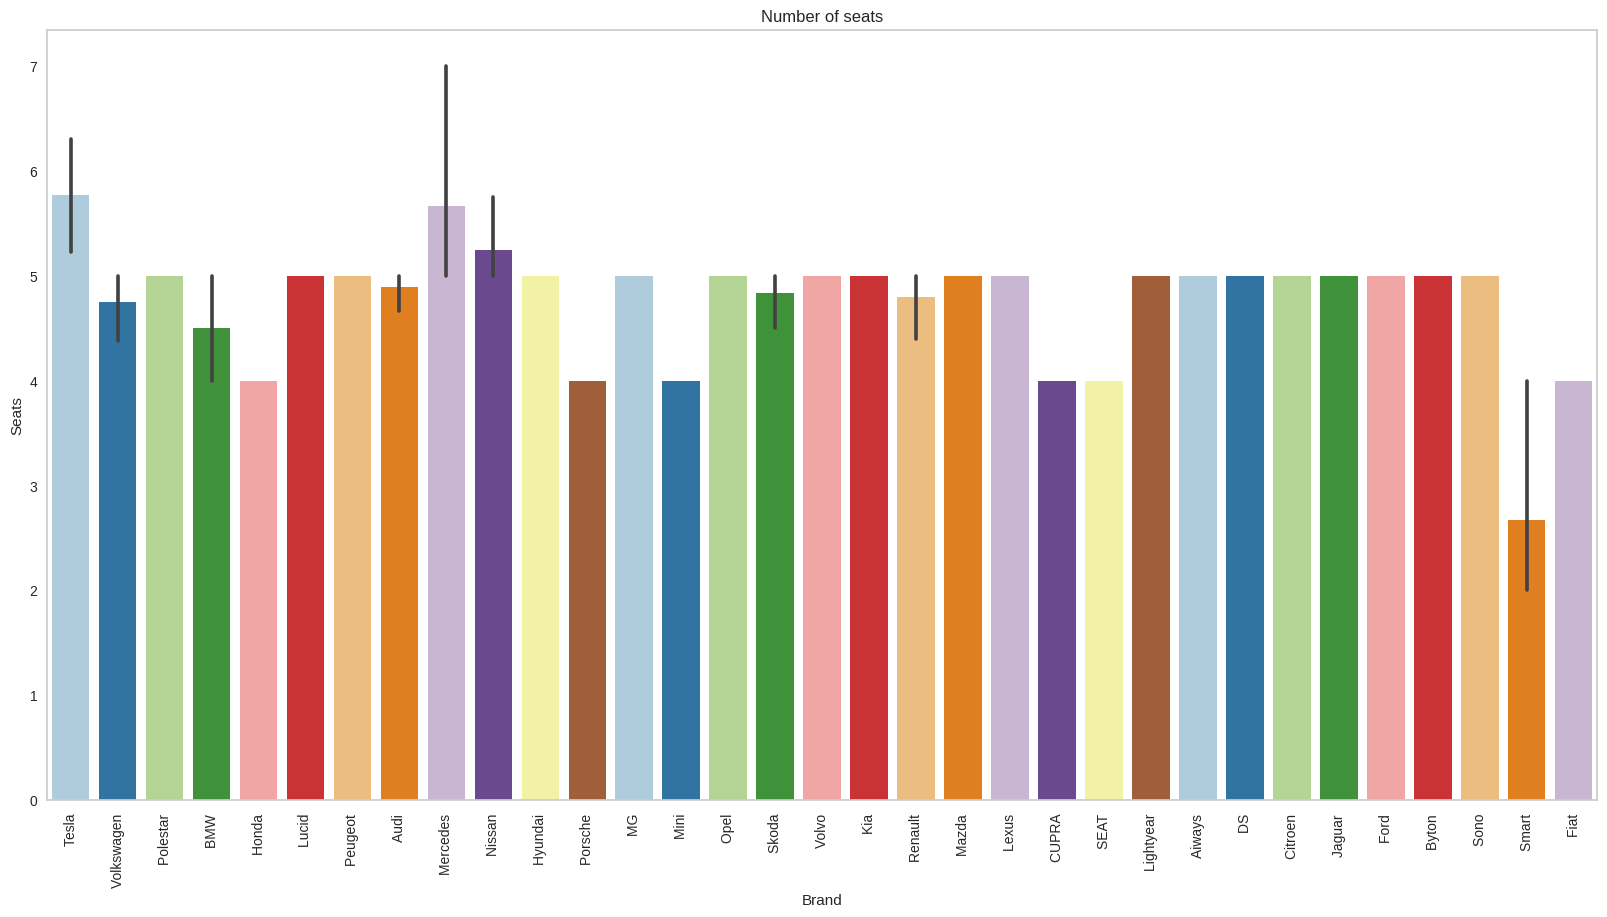

In [27]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Brand',y = 'Seats',data = ev,palette ='Paired')
plt.grid(axis ='y')
plt.title('Number of seats')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation = 90)

Mercedes, Tesla and Nissan have the highest number of seats and Smart the lowest

<ipython-input-28-f526ba41440c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

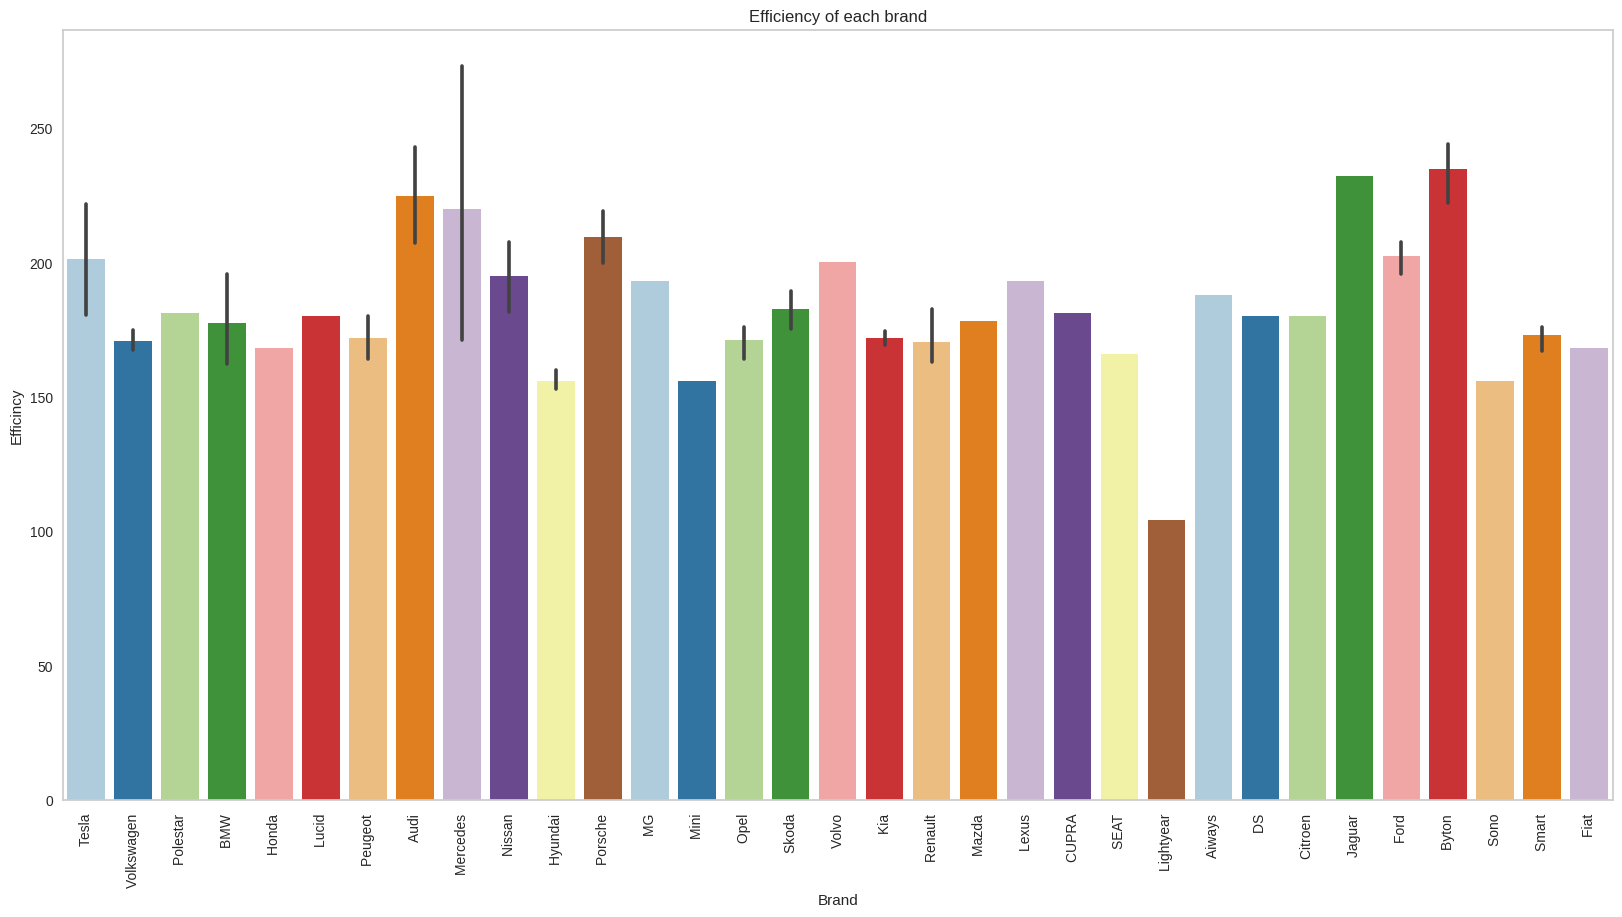

In [28]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Brand',y = 'Efficiency_WhKm',data = ev,palette ='Paired')
plt.grid(axis ='y')
plt.title('Efficiency of each brand')
plt.xlabel('Brand')
plt.ylabel('Efficincy')
plt.xticks(rotation = 90)

Byton , Jaguar and Audi are the most efficient and Lightyear the least

In [29]:
ev1 = ev[['TopSpeed_KmH', 'INR']].groupby('TopSpeed_KmH').count()
ev1 = ev1.sort_values('TopSpeed_KmH', ascending = True)
ev1.head()

,INR
TopSpeed_KmH,
123,1
130,7
135,3
140,4
144,1


In [30]:
ev2 = ev[['TopSpeed_KmH', 'Range_Km']].groupby('Range_Km').count()
ev2.sort_values('Range_Km', ascending = True, inplace = True)
ev2.head()

,TopSpeed_KmH
Range_Km,
95,2
100,1
130,1
160,1
170,2


In [32]:
ev3 = ev[['Range_Km', 'INR']].groupby('Range_Km').count()
ev3.sort_values('Range_Km', ascending = True, inplace = True)
ev3.head()



,INR
Range_Km,
95,2
100,1
130,1
160,1
170,2


Text(0.5, 1.0, 'Cost of maximum Range')

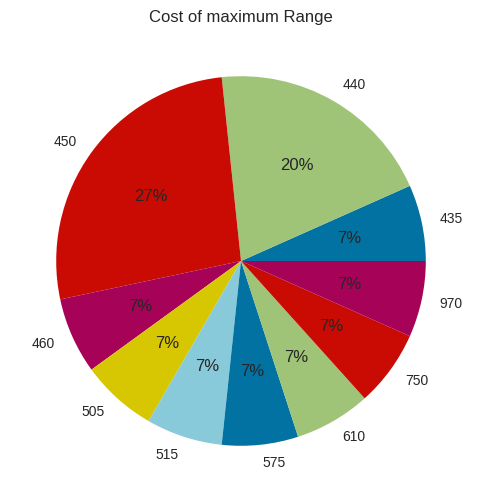

In [33]:
plt.figure(figsize = (10,6))
plt.pie(x = ev3['INR'].tail(10), labels = ev3.tail(10).index, autopct='%1.0f%%')
plt.title('Cost of maximum Range')

Text(0.5, 1.0, 'Top Speed of maximum Range')

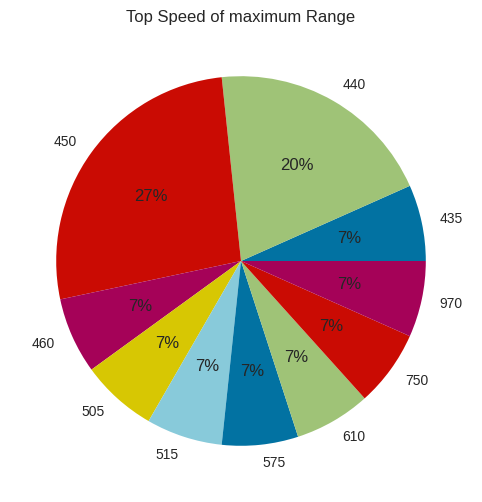

In [34]:
plt.figure(figsize = (10,6))
plt.pie(x = ev2['TopSpeed_KmH'].tail(10), labels = ev2.tail(10).index, autopct='%1.0f%%')
plt.title('Top Speed of maximum Range')

Text(0.5, 1.0, 'Cost of Top Speed')

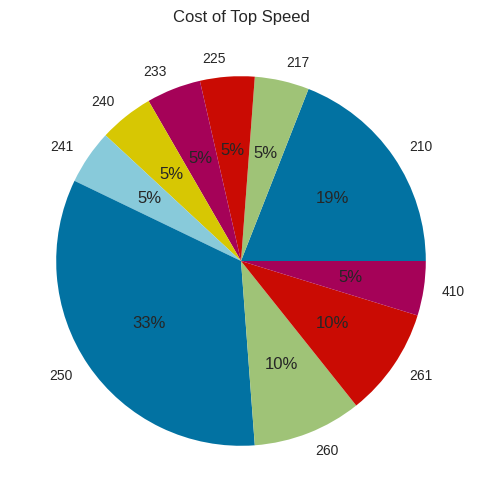

In [35]:
plt.figure(figsize = (10,6))
plt.pie(x = ev1['INR'].tail(10), labels = ev1.tail(10).index, autopct='%1.0f%%')
plt.title('Cost of Top Speed')

Text(0.5, 1.0, 'Segment')

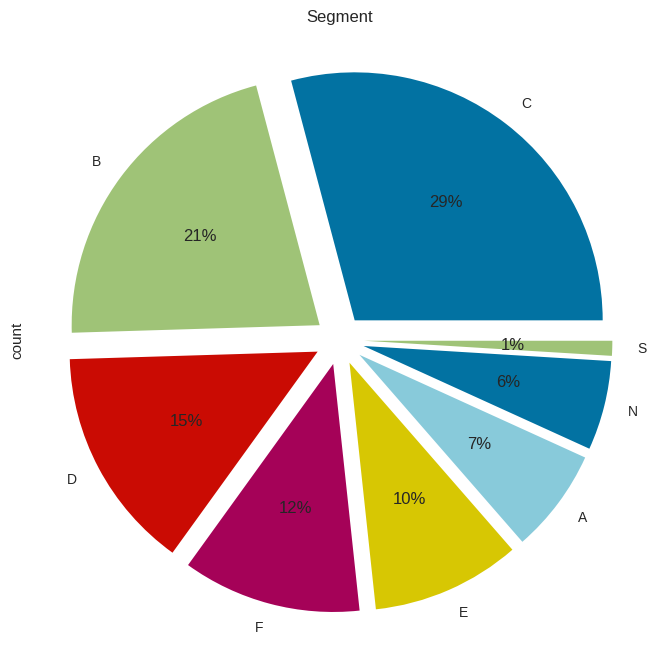

In [36]:
ev['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')

Text(0.5, 1.0, 'Body Style')

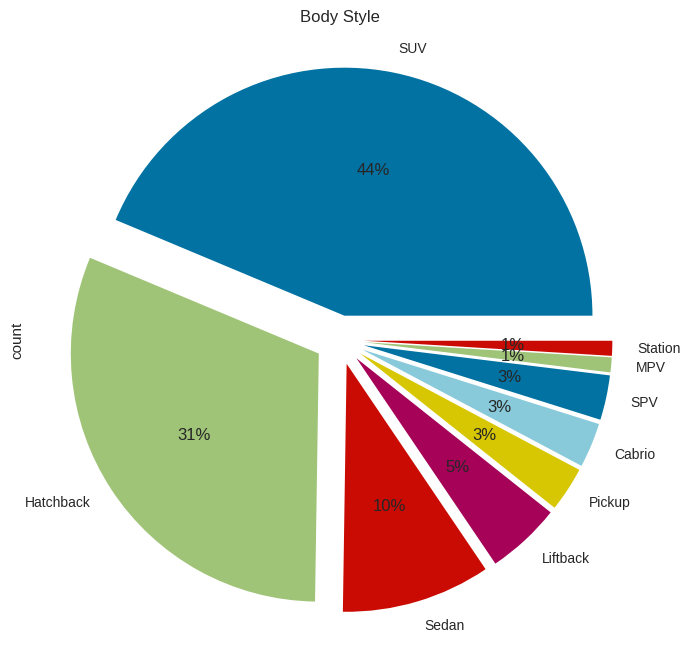

In [37]:
ev['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')

Text(0.5, 1.0, 'Seats')

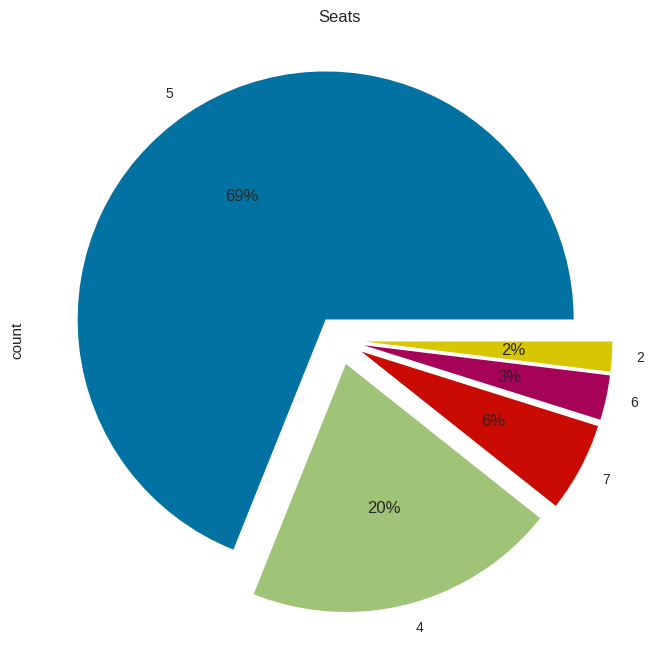

In [38]:
ev['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

Most of the cars has maximum of 5 seats

<ipython-input-39-2ab670cc9df0>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32

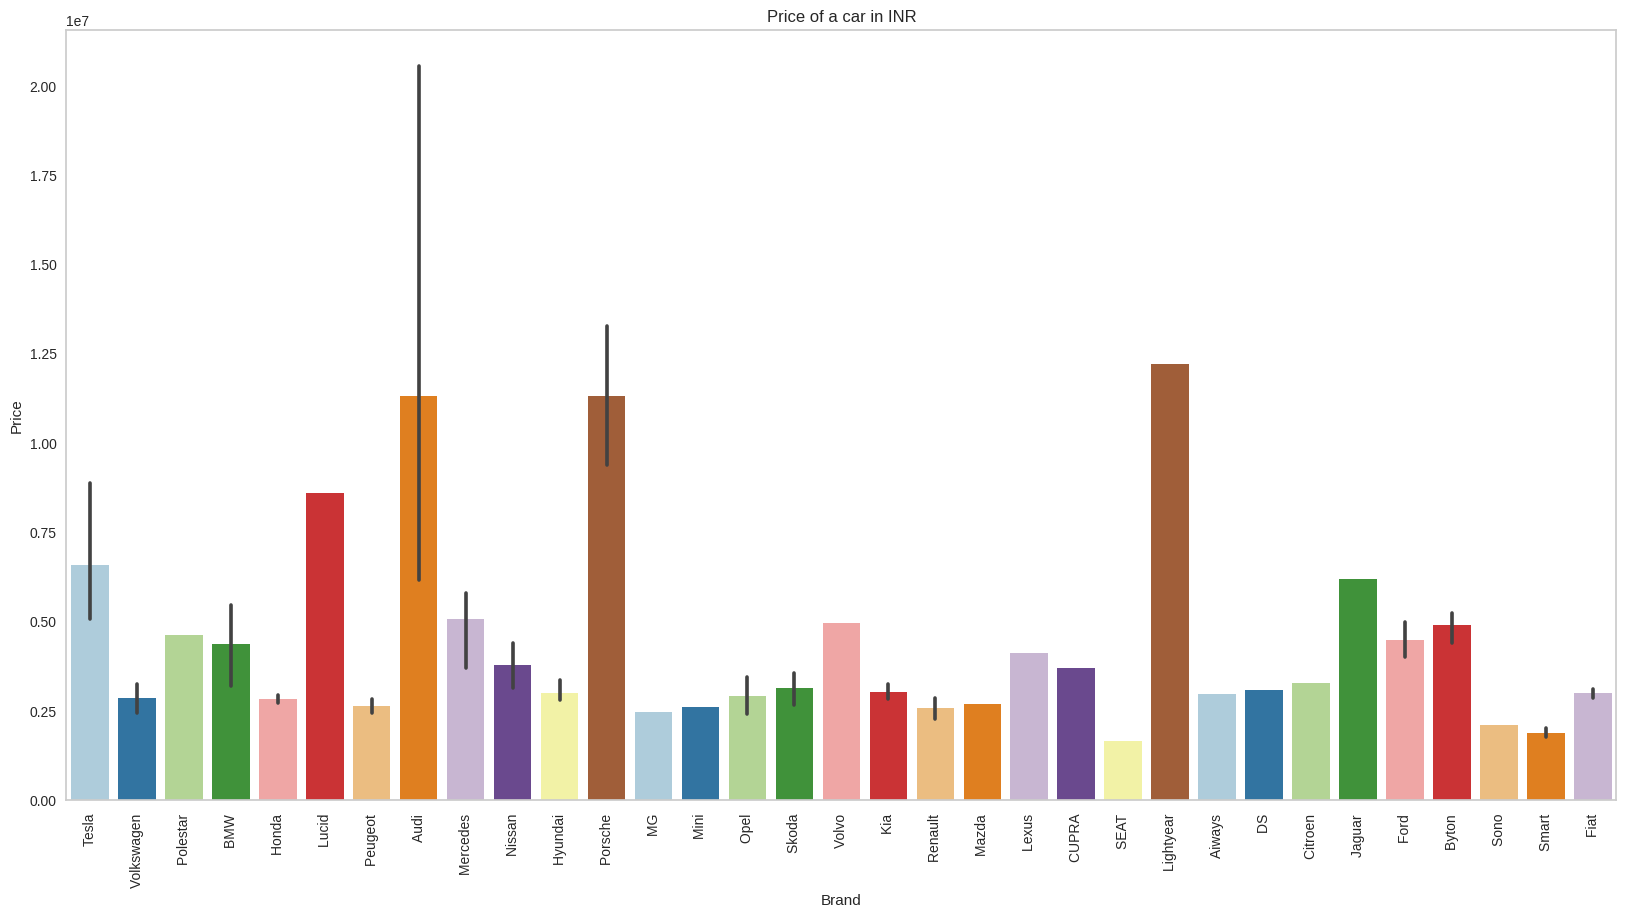

In [39]:
plt.figure(figsize = (20, 10))
sns.barplot(x = 'Brand',y ='INR',data = ev,palette ='Paired')
plt.grid(axis ='y')
plt.title('Price of a car in INR')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation = 90)

Porche, Lightyear and Audi are expencive brands while Seat is cheapest one.

LabelEncoding

In [40]:
lb = LabelEncoder()
ev['RapidCharge'] = lb.fit_transform(ev[['RapidCharge']])
ev['PowerTrain'] = lb.fit_transform(ev['PowerTrain'])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [41]:
x = ev[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y = ev['INR']

In [42]:
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    INR   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     5.470
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           6.63e-05
Time:                        15:34:52   Log-Likelihood:                -1719.9
No. Observations:                 103   AIC:                             3454.
Df Residuals:                      96   BIC:                             3472.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.982e+06    6.1e+06     -0.489      0.626   -1.51e+07    9.12e+06
AccelSec         8.885e+04   2.53e+05      0.352      0.726   -4.13e+05     5.9e+05
Range_Km         6482.6924   5452.746      1.189      0.237   -4340.922    1.73e+04
TopSpeed_KmH      3.01e+04   1.93e+04      1.558      0.122   -8243.796    6.84e+04
Efficiency_WhKm  2725.2251   1.69e+04      0.161      0.873   -3.09e+04    3.64e+04
RapidCharge      3.416e+05   1.08e+06      0.315      0.753   -1.81e+06    2.49e+06
PowerTrain      -1.245e+06   7.12e+05     -1.748      0.084   -2.66e+06    1.69e+05
==============================================================================
Omnibus:                      197.184   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23550.721
Skew:                           8.041   Prob(JB):                         0.00
Kurtosis:                      75.311   Cond. No.                     6.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
x_train.shape, y_train.shape

((72, 7), (72,))

LinearRegression

In [44]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.19852972039316608, 0.5324089029581873)

In [46]:
y_pred = lr.predict(x_test)
r2 = r2_score(y_test, y_pred)
r2

0.5324089029581873

LogisticRegression

In [47]:
x1 = ev[['INR']]
y1 = ev[['RapidCharge']]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.5, random_state = 1)
lg = LogisticRegression()
lg.fit(x1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [48]:
y1_pred = lg.predict(x1_test)
y1_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
con = confusion_matrix(y1_test, y1_pred)
con

array([[ 0,  9],
       [ 0, 43]])

In [50]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'INR','PowerTrain']

x = ev.loc[:, features].values
x = StandardScaler().fit_transform(x)

PCA

In [51]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.510948,-0.791509,-0.935325,-1.079538,0.284896,-1.042819,-0.351339,1.138032,-0.202522
1,-2.264692,-0.169049,0.928566,-0.765169,1.066840,0.195739,-0.121962,-0.382264,0.438876
2,1.632305,-0.130327,-0.580394,-0.271792,-0.237282,-0.830073,-0.167520,0.115280,-0.136624
3,0.190819,0.045366,-0.328135,-0.557701,-0.077354,1.634599,-0.271246,0.222239,0.021528
4,-2.576951,-0.645104,-0.858211,0.227355,-0.667724,0.658759,-0.252411,-0.270942,0.322600
...,...,...,...,...,...,...,...,...,...
98,-0.241445,0.385098,-0.513547,-0.033553,-0.238244,0.260184,-0.007451,0.081141,-0.263986
99,2.114916,0.808533,0.843816,0.889159,-1.427511,0.484198,-0.262005,0.040045,0.080696
100,0.840526,0.346498,-0.323806,0.284237,-0.635425,-0.763662,-0.114685,-0.146151,0.179782
101,1.520676,0.732823,0.334888,0.503652,-1.105738,-0.044156,0.150588,-0.276369,-0.021229


In [52]:
df=data.iloc[:,:9]
df.head(3)

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8,PC9
0,2.510948,-0.791509,-0.935325,-1.079538,0.284896,-1.042819,-0.351339,1.138032,-0.202522
1,-2.264692,-0.169049,0.928566,-0.765169,1.066840,0.195739,-0.121962,-0.382264,0.438876
2,1.632305,-0.130327,-0.580394,-0.271792,-0.237282,-0.830073,-0.167520,0.115280,-0.136624


In [53]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning:

Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,-0.414872,0.112566,0.025296,0.221535,0.222282,0.018003,0.522332,0.584953,0.317425
PC2,0.429293,-0.213158,0.045050,-0.173944,-0.049925,-0.088049,0.015436,-0.044889,0.851755
PC3,0.247430,0.400374,0.521116,0.174061,-0.493055,0.461695,0.124103,0.070281,0.003755
PC4,0.410926,-0.162834,-0.001431,-0.299066,0.073327,0.065532,-0.245096,0.762461,-0.253164
Pc5,0.172025,0.161212,-0.840664,0.216207,-0.357630,0.220164,0.076686,0.080643,0.046916
PC6,0.405691,-0.050475,-0.051826,-0.268427,0.281712,0.125053,0.736817,-0.223750,-0.264887
PC7,0.163022,0.783762,-0.084058,-0.101453,0.515094,-0.013602,-0.240543,-0.043433,0.128561
PC8,0.277590,-0.296215,0.053607,0.715428,0.447680,0.305628,-0.153175,-0.055046,-0.013062
PC9,-0.340141,-0.156572,-0.080161,-0.400000,0.163150,0.785342,-0.146131,-0.089692,0.143472


Hierarchical Clustering

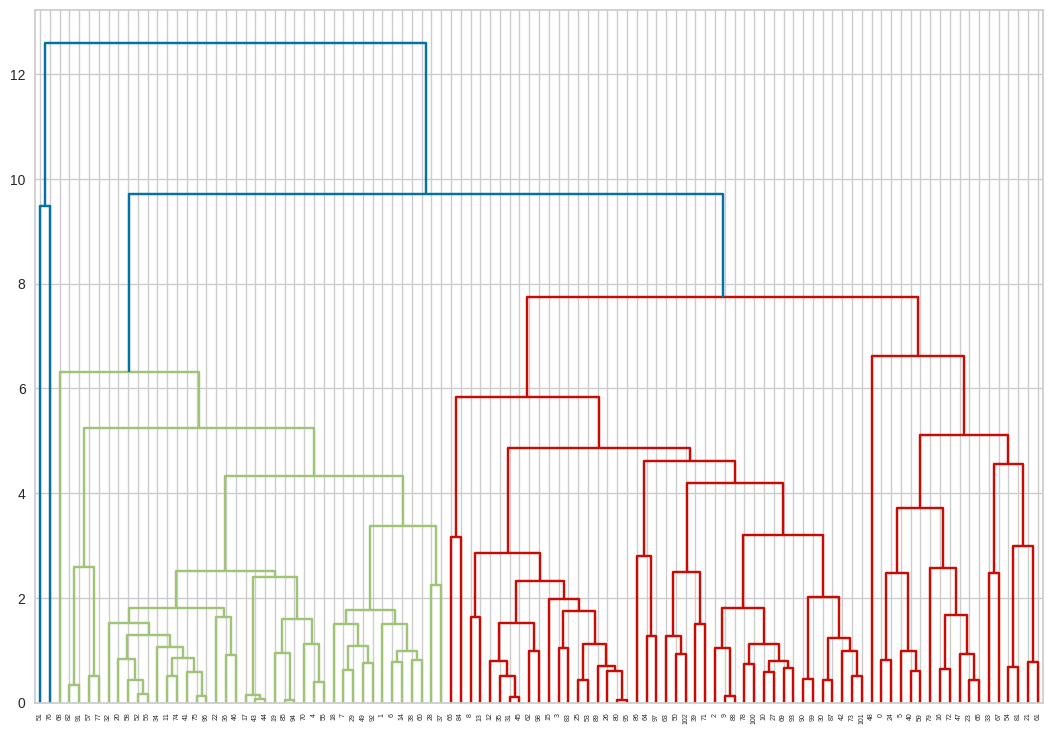

In [54]:
linked = linkage(data, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

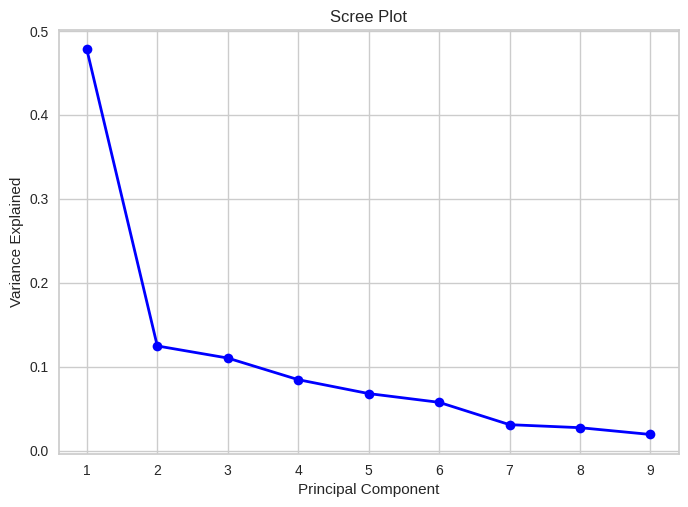

In [55]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

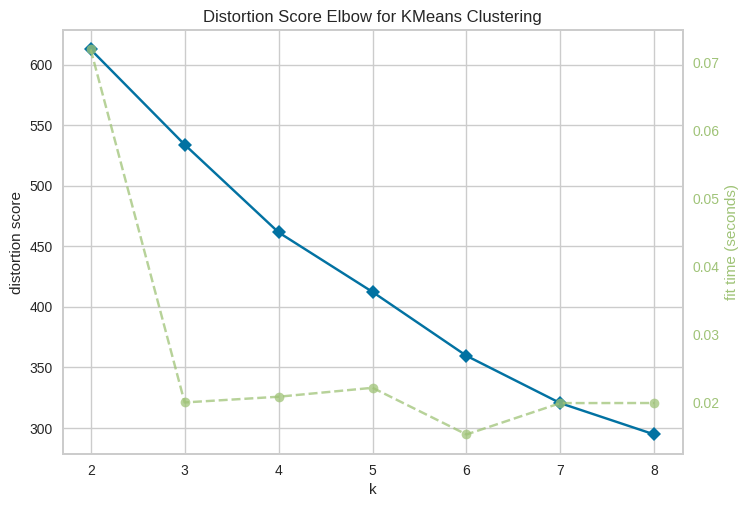

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)
visualizer.show()

In [57]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_)

[3 0 3 1 1 3 0 0 1 2 2 1 1 3 0 1 3 1 0 1 1 3 1 3 3 1 1 2 0 0 2 1 1 2 1 1 1
 0 0 2 3 1 2 1 1 1 1 3 3 0 2 3 1 1 2 1 1 0 1 3 0 3 1 2 0 3 1 2 0 2 1 2 3 2
 1 1 3 0 2 3 1 2 0 1 2 1 2 2 2 1 2 0 0 2 1 1 1 0 1 2 2 2 2]
461.5123156114659
6
[[-2.13774785e+00 -4.45370584e-01  1.21250010e+00 -2.92298630e-01
   4.69967421e-01 -1.32450024e-01  1.49772900e-03 -5.15449499e-02
   5.14132176e-02]
 [-1.17067564e+00  8.42285655e-02 -8.20668797e-01 -3.67416820e-02
  -9.53802603e-02  2.43751652e-01  1.50897025e-02 -3.12136850e-02
   1.09722653e-02]
 [ 1.41084593e+00  8.71129795e-01  6.05850181e-01  2.27233891e-01
  -4.39168074e-01 -1.02901796e-01  7.35849601e-02 -9.05341622e-02
  -1.24477816e-01]
 [ 2.82012448e+00 -9.75359789e-01 -3.31269714e-01  6.19588929e-02
   3.50233296e-01 -2.53226052e-01 -1.41402995e-01  2.54543870e-01
   1.01148970e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-57-c0ed8bfefd40>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
Counter(kmeans.labels_)

Counter({3: 18, 0: 19, 1: 40, 2: 26})

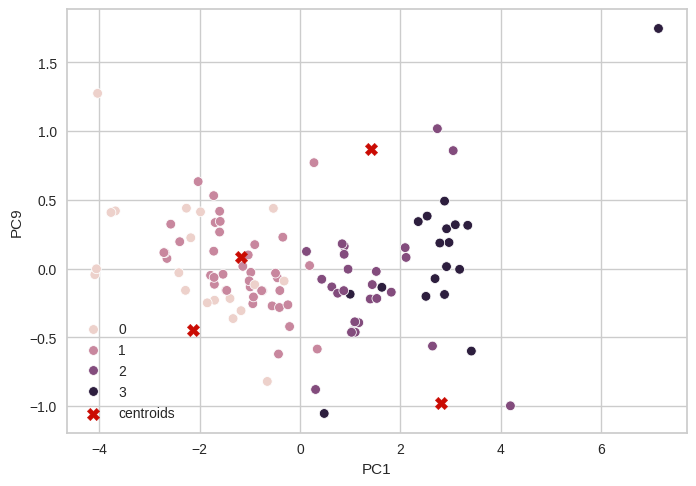

In [59]:
sns.scatterplot(data=data, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [60]:
X = data[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y = ev['INR']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 1)
lin = lr.fit(X_train, y_train)
lin

LinearRegression()

In [62]:
lin.intercept_

4983453.390582525

In [63]:
lin.coef_

array([-1.59573156e-09,  2.79396772e-09, -3.05590220e-09,  0.00000000e+00,
        7.27595761e-10,  3.49245965e-10,  2.52293830e-09,  5.00779098e+06,
        1.33877620e-09])

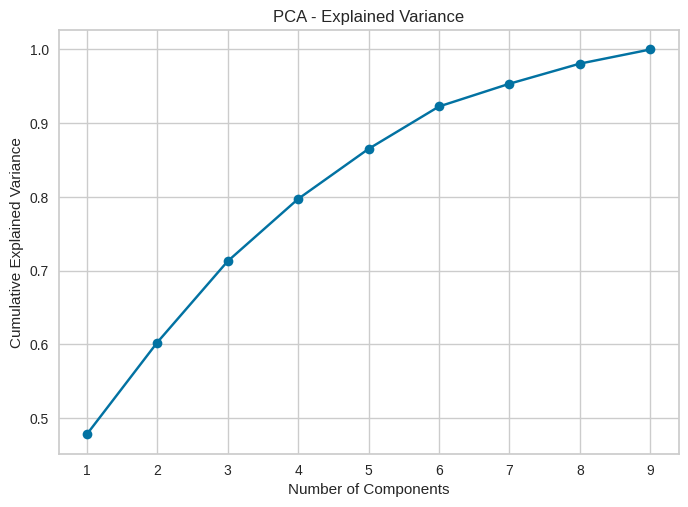

In [64]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()

In [65]:
ev['Brand'] = ev['Brand'].astype('category')
ev['Model'] = ev['Model'].astype('category')
ev['Segment'] = ev['Segment'].astype('category')
ev['BodyStyle'] = ev['BodyStyle'].astype('category')
ev['RapidCharge'] = ev['RapidCharge'].astype('category')
ev['PlugType'] = ev['PlugType'].astype('category')
ev['Seats'] = ev['Seats'].astype('category')
ev['PowerTrain'] = ev['PowerTrain'].astype('category')

ev1 = pd.get_dummies(ev, columns=ev.select_dtypes(['category']).columns)

K-Means Clustering

In [66]:
evx = pca.fit_transform(ev1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



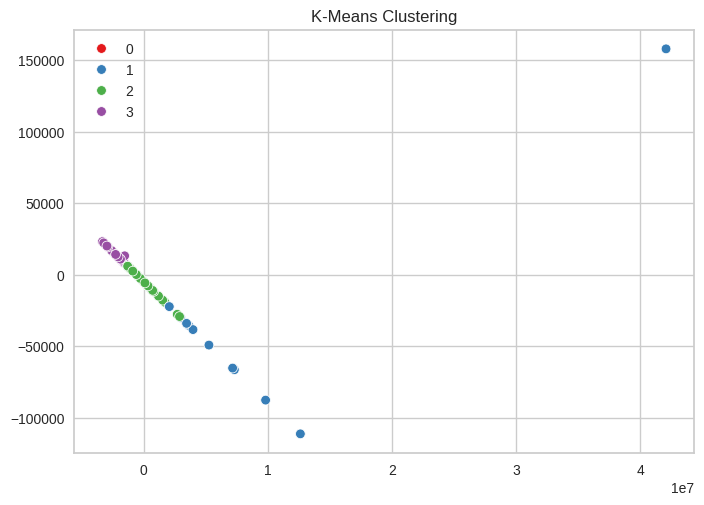

In [67]:
scaler = StandardScaler()
mdx_scaled = scaler.fit_transform(ev1)

# K-Means clustering
best_k = 4  # Determined from plots and analysis
kmeans = KMeans(n_clusters=4, random_state=1234)
clusters = kmeans.fit_predict(mdx_scaled)

# Plot K-Means results
sns.scatterplot(x=evx[:, 0], y=evx[:, 1], hue=clusters, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

Gaussian Mixture Model (GMM)

In [68]:
mm =gmm = GaussianMixture(n_components=4, random_state=1234)
gmm_clusters = gmm.fit_predict(mdx_scaled)

# Compare clustering results
pd.crosstab(clusters, gmm_clusters, rownames=['KMeans'], colnames=['GMM'])

GMM,0,1,2,3
KMeans,,,,
0,0,3,0,0
1,0,2,16,8
2,0,8,15,0
3,1,50,0,0
